<a href="https://colab.research.google.com/github/Ham2009/cancer/blob/main/trainement_et_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11) # It's my lucky number
from google.colab import files
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
!pip install rarfile                                       # pour decompresser le fichier .rar



In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.rar to train.rar


In [5]:
import rarfile

# Spécifiez le nom du fichier RAR que vous souhaitez extraire
rar_filename = "train.rar"  # Assurez-vous d'utiliser le nom correct du fichier

# Créez un objet RarFile
with rarfile.RarFile(rar_filename, 'r') as rf:
    # Extraire le contenu du fichier RAR
    rf.extractall()


In [6]:
!ls

sample_data  train  train.rar


In [7]:


# Définissez le chemin vers le dossier "train" contenant les sous-dossiers "benign" et "malignant"
TRAIN_DATA = "train"
# Paramètres du modèle
input_shape = (150, 150, 3)
NUM_CLASSES = 2  # benign et malignant

# Créez un générateur de données pour augmenter les images d'entraînement
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Chargez les données d'entraînement depuis le dossier "train"
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical'
)

# Créez le modèle CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))  # Remplacez num_classes par NUM_CLASSES

# Compilez le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraînez le modèle
model.fit(
    train_generator,
    epochs=10,
    verbose=1
)

# Sauvegardez le modèle entraîné pour une utilisation ultérieure
model.save('model_cancer.h5')


Found 2637 images belonging to 2 classes.
Epoch 1/10
83/83 [==============================] - 141s 2s/step - loss: 0.6054 - accuracy: 0.7016
Epoch 2/10
83/83 [==============================] - 137s 2s/step - loss: 0.5010 - accuracy: 0.7395
Epoch 3/10
83/83 [==============================] - 136s 2s/step - loss: 0.4342 - accuracy: 0.7873
Epoch 4/10
83/83 [==============================] - 138s 2s/step - loss: 0.4270 - accuracy: 0.7895
Epoch 5/10
83/83 [==============================] - 137s 2s/step - loss: 0.4392 - accuracy: 0.7937
Epoch 6/10
83/83 [==============================] - 137s 2s/step - loss: 0.4012 - accuracy: 0.8055
Epoch 7/10
83/83 [==============================] - 137s 2s/step - loss: 0.4211 - accuracy: 0.7918
Epoch 8/10
83/83 [==============================] - 138s 2s/step - loss: 0.3933 - accuracy: 0.8043
Epoch 9/10
83/83 [==============================] - 138s 2s/step - loss: 0.4013 - accuracy: 0.8005
Epoch 10/10
83/83 [==============================] - 138s 2s/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
import os
print(os.getcwd())


/content


In [9]:
!ls


model_cancer.h5  sample_data  train  train.rar


In [10]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

# Chargez le modèle pré-entraîné
model = load_model('model_cancer.h5')

# Fonction pour effectuer une prédiction sur une image
def predict_cancer(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Assurez-vous de normaliser l'image de la même manière que pendant l'entraînement

    # Effectuez la prédiction
    prediction = model.predict(img)

    # Interprétez la prédiction
    if prediction[0][0] > prediction[0][1]:
        return "benign"
    else:
        return "malignant"

In [11]:
# Utilisez files.upload() pour télécharger une image depuis votre ordinateur local
uploaded = files.upload()

Saving ISIC_0024308.jpg to ISIC_0024308.jpg


In [12]:
# Récupérez le nom du fichier de l'image téléchargée
image_filename = list(uploaded.keys())[0]

# Utilisez la fonction pour effectuer la prédiction
RESULT = predict_cancer(image_filename)

# Affichez le résultat
print(f"L'image est probablement : {RESULT}")

1/1 [==============================] - 0s 125ms/step
L'image est probablement : malignant


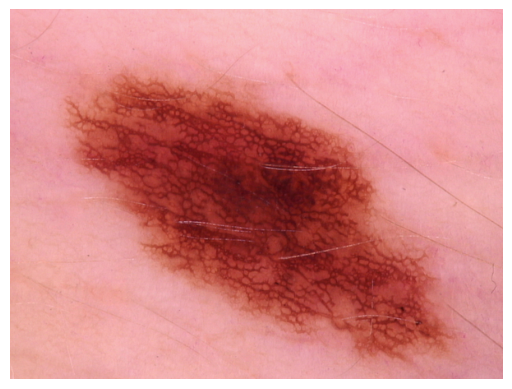

In [13]:
# Chargez l'image et affichez-la
img = image.load_img(image_filename)
plt.imshow(img)
plt.axis('off')  # Pour masquer les axes
plt.show()

In [23]:
# Utilisez files.upload() pour télécharger une image depuis votre ordinateur local
uploaded = files.upload()

Saving ISIC_0024319.jpg to ISIC_0024319.jpg


In [24]:
# Récupérez le nom du fichier de l'image téléchargée
image_filename = list(uploaded.keys())[0]

# Utilisez la fonction pour effectuer la prédiction
RESULT = predict_cancer(image_filename)

# Affichez le résultat
print(f"L'image est probablement : {RESULT}")

1/1 [==============================] - 0s 36ms/step
L'image est probablement : malignant


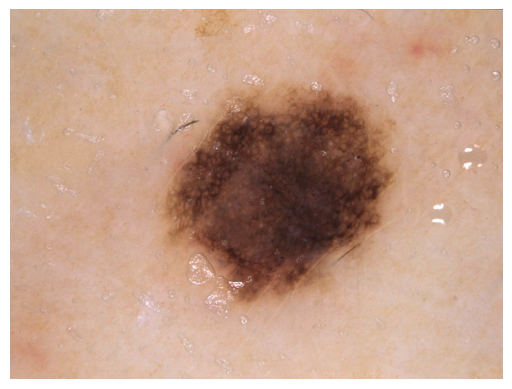

In [25]:
# Chargez l'image et affichez-la
img = image.load_img(image_filename)
plt.imshow(img)
plt.axis('off')  # Pour masquer les axes
plt.show()

In [20]:
!ls

ISIC_0024308.jpg  ISIC_0029310.jpg  sample_data  train.rar
ISIC_0029306.jpg  model_cancer.h5   train


In [26]:
uploaded = files.upload()

Saving cancer de peau2-1.rar to cancer de peau2-1.rar


In [28]:
 #Charger le modèle de prédiction pré-entraîné
model = load_model('model_cancer.h5')

In [33]:
import rarfile

# Spécifiez le chemin complet du fichier RAR
rar_file_path = '/content/cancer de peau2-1.rar'  # Remplacez par le chemin complet réel

# Décompressez le fichier RAR
with rarfile.RarFile(rar_file_path, 'r') as rar_ref:
    rar_ref.extractall('/content')  # Vous pouvez spécifier le répertoire de destination

# Maintenant, vérifiez si les fichiers ont été extraits avec !ls
!ls


'cancer de peau2-1'	  ISIC_0024318.jpg   ISIC_0029310.jpg   train
'cancer de peau2-1.rar'   ISIC_0024319.jpg   model_cancer.h5    train.rar
 ISIC_0024308.jpg	  ISIC_0029306.jpg   sample_data


In [38]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np


# Chemin vers le dossier contenant les images décompressées
image_folder = 'cancer de peau2-1'

# Liste des noms de fichiers d'images dans le dossier
image_filenames = os.listdir(image_folder)

# Prétraitement et prédiction pour chaque image
for image_filename in image_filenames:
    # Construire le chemin complet de l'image
    image_path = os.path.join(image_folder, image_filename)

    # Charger l'image
    img = image.load_img(image_path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Assurez-vous de normaliser l'image de la même manière que pendant l'entraînement

    # Effectuer la prédiction
    prediction = model.predict(img)

    # Interpréter la prédiction (ex. : benin ou malin)
    if prediction[0][0] > prediction[0][1]:
        result = "Benin"
    else:
        result = "Malin"

    print(f"Image: {image_filename}, Prédiction: {result}")

# Nettoyer : supprimer le dossier décompressé si nécessaire
# shutil.rmtree(image_folder)


1/1 [==============================] - 0s 139ms/step
Image: ISIC_0029401.jpg, Prédiction: Benin
1/1 [==============================] - 0s 54ms/step
Image: ISIC_0030199.jpg, Prédiction: Benin
1/1 [==============================] - 0s 54ms/step
Image: ISIC_0029560.jpg, Prédiction: Malin
1/1 [==============================] - 0s 55ms/step
Image: ISIC_0029597.jpg, Prédiction: Malin
1/1 [==============================] - 0s 58ms/step
Image: ISIC_0030334.jpg, Prédiction: Malin
1/1 [==============================] - 0s 55ms/step
Image: ISIC_0030303.jpg, Prédiction: Benin
1/1 [==============================] - 0s 59ms/step
Image: ISIC_0029699.jpg, Prédiction: Benin
1/1 [==============================] - 0s 59ms/step
Image: ISIC_0030305.jpg, Prédiction: Malin
1/1 [==============================] - 0s 63ms/step
Image: ISIC_0029786.jpg, Prédiction: Malin
1/1 [==============================] - 0s 54ms/step
Image: ISIC_0030046.jpg, Prédiction: Benin
1/1 [==============================] - 0s 58ms/st

In [31]:
!ls


'cancer de peau2-1.rar'   ISIC_0024319.jpg   model_cancer.h5   train.rar
 ISIC_0024308.jpg	  ISIC_0029306.jpg   sample_data
 ISIC_0024318.jpg	  ISIC_0029310.jpg   train


In [49]:
# Créez des listes pour stocker les images classées
benign_images = []
malignant_images = []

# Obtenez la liste des noms de fichiers d'images dans le dossier
image_files = os.listdir(image_folder)

# Parcourez toutes les images et classez-les en fonction des prédictions du modèle
for image_file in image_files:
    img_path = os.path.join(image_folder, image_file)
    img = image.load_img(img_path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Assurez-vous de normaliser l'image de la même manière que pendant l'entraînement

    # Effectuez la prédiction
    prediction = model.predict(img)

    # Interprétez la prédiction
    if prediction[0][0] > prediction[0][1]:
        benign_images.append(img_path)
    else:
        malignant_images.append(img_path)

# Affichez ou enregistrez les images classées
print("Images bénignes :")
for img_path in benign_images:
    print(img_path)

print("\nImages malignes :")
for img_path in malignant_images:
    print(img_path)

1/1 [==============================] - 0s 35ms/step
Images bénignes :
cancer de peau2-1/ISIC_0029401.jpg
cancer de peau2-1/ISIC_0030199.jpg
cancer de peau2-1/ISIC_0030303.jpg
cancer de peau2-1/ISIC_0029699.jpg
cancer de peau2-1/ISIC_0030046.jpg
cancer de peau2-1/ISIC_0030260.jpg
cancer de peau2-1/ISIC_0029681.jpg
cancer de peau2-1/ISIC_0029848.jpg
cancer de peau2-1/ISIC_0029599.jpg
cancer de peau2-1/ISIC_0029439.jpg
cancer de peau2-1/ISIC_0029483.jpg
cancer de peau2-1/ISIC_0030486.jpg
cancer de peau2-1/ISIC_0030409.jpg
cancer de peau2-1/ISIC_0030241.jpg
cancer de peau2-1/ISIC_0029739.jpg
cancer de peau2-1/ISIC_0029774.jpg
cancer de peau2-1/ISIC_0029764.jpg
cancer de peau2-1/ISIC_0030438.jpg
cancer de peau2-1/ISIC_0030138.jpg
cancer de peau2-1/ISIC_0029866.jpg
cancer de peau2-1/ISIC_0029646.jpg
cancer de peau2-1/ISIC_0030481.jpg
cancer de peau2-1/ISIC_0030352.jpg
cancer de peau2-1/ISIC_0030040.jpg
cancer de peau2-1/ISIC_0030489.jpg
cancer de peau2-1/ISIC_0029669.jpg
cancer de peau2-1/IS

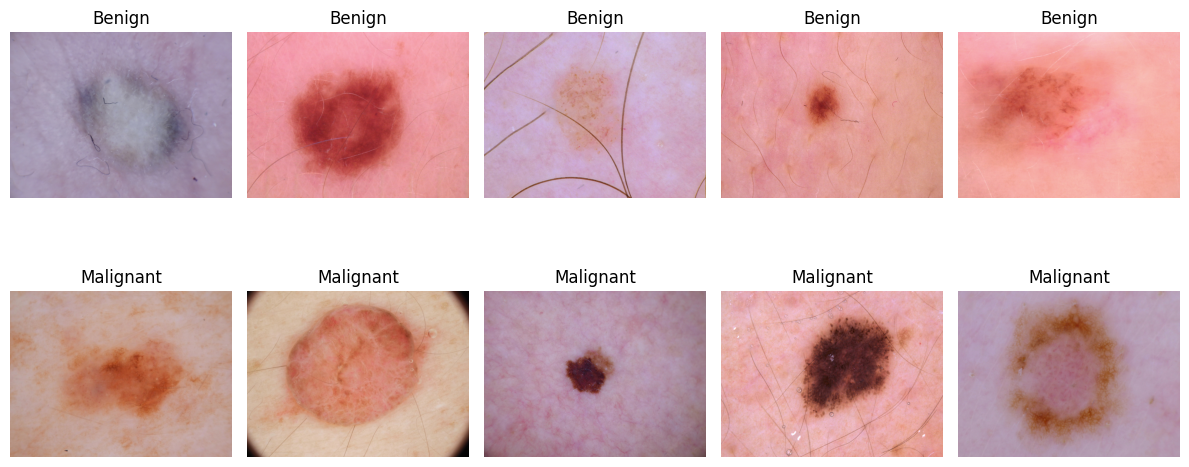

In [54]:
# Affichez les 5 premières images bénignes
plt.figure(figsize=(12, 6))
for i in range(5):
    img = plt.imread(benign_images[i])
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title('Benign')
    plt.axis('off')

# Affichez les 5 premières images malignes
for i in range(5):
    img = plt.imread(malignant_images[i])
    plt.subplot(2, 5, i + 6)
    plt.imshow(img)
    plt.title('Malignant')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [55]:


# Comptez le nombre d'images bénignes et malignes
num_benign = len(benign_images)
num_malignant = len(malignant_images)

# Affichez le nombre d'images bénignes et malignes
print(f"Nombre d'images bénignes : {num_benign}")
print(f"Nombre d'images malignes : {num_malignant}")


Nombre d'images bénignes : 729
Nombre d'images malignes : 471
